#Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib
from matplotlib import rc, font_manager

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from collections import Counter

from sklearn.neighbors import KNeighborsClassifier # models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier # tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
path = 'PATH_TO_DATASET_IN_DRIVE'

Mounted at /content/gdrive


#Functions

In [ ]:
def verify_unnamed_in_base(base):
  if base.columns[0] == 'Unnamed: 0': # verifying if the first collumn is bugged
    base.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
  return base

In [ ]:
def get_best_auc_roc_near_miss(type_near_miss, base_type, model_type, type_undersampling):
  neighbors = [3, 5, 7, 9, 11]
  if base_type == 'base_total':
    if (type_near_miss == '1') or (type_near_miss == '2'): 
      try: # first loop to get results and compare with others
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

      auc_roc_max = best_results['AUC ROC'][0]
      k_of_auc_roc_max = 1
      base_with_bigger_auc_roc = best_results.copy()
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_NORMALIZADO.csv', sep=',')
      best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_NORMALIZADO_model.csv', sep=',')

      for n in neighbors:
        try:
          best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        except:
          best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

        if ((best_results['AUC ROC'][0]) > auc_roc_max):
          auc_roc_max = best_results['AUC ROC'][0]
          k_of_auc_roc_max = n # getting k
          base_with_bigger_auc_roc = best_results.copy() # getting base
          best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_NORMALIZADO.csv', sep=',')
          best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_NORMALIZADO_model.csv', sep=',')

        #print(best_results['AUC ROC'][0])
    elif type_near_miss == '3': 
      try: # first loop to get results and compare with others
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

      auc_roc_max = best_results['AUC ROC'][0]
      k_1_of_auc_roc_max = 1
      k_2_of_auc_roc_max = 3
      base_with_bigger_auc_roc = best_results.copy()
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_NORMALIZADO.csv', sep=',')
      best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_NORMALIZADO_model.csv', sep=',')

      k_of_auc_roc_max = {
          'k1': k_1_of_auc_roc_max,
          'k2': k_2_of_auc_roc_max
      }

      neighbors_2 = [1, 3, 5, 7, 9, 11]

      for n in neighbors_2:
        for n2 in neighbors_2:
          if n2 > n:
            try:
              best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
            except:
              best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

            if ((best_results['AUC ROC'][0]) > auc_roc_max):
              auc_roc_max = best_results['AUC ROC'][0]
              k_of_auc_roc_max = {
                  'k1': n,
                  'k2': n2
              }
              base_with_bigger_auc_roc = best_results.copy() # pegando a base
              best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_NORMALIZADO.csv', sep=',')
              best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_NORMALIZADO_model.csv', sep=',')
  elif base_type == 'base_reduzida':
    if (type_near_miss == '1') or (type_near_miss == '2'):
      best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

      auc_roc_max = best_results['AUC ROC'][0]
      k_of_auc_roc_max = 1
      base_with_bigger_auc_roc = best_results.copy()
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
      best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k1_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')

      for n in neighbors:
        try:
          best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_RECORTE_FEITO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        except:
          best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

        if ((best_results['AUC ROC'][0]) > auc_roc_max):
          auc_roc_max = best_results['AUC ROC'][0]
          k_of_auc_roc_max = n # pegando o k
          base_with_bigger_auc_roc = best_results.copy() # pegando a base
          best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
          best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')

        #print(best_results['AUC ROC'][0])
    elif type_near_miss == '3':
      try: # first loop to get results and compare with others
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_RECORTE_FEITO'+type_undersampling+'_NORMALIZADO.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

      auc_roc_max = best_results['AUC ROC'][0]
      k_1_of_auc_roc_max = 1
      k_2_of_auc_roc_max = 3
      base_with_bigger_auc_roc = best_results.copy()
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
      best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k13_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')

      k_of_auc_roc_max = {
          'k1': k_1_of_auc_roc_max,
          'k2': k_2_of_auc_roc_max
      }

      neighbors_2 = [1, 3, 5, 7, 9, 11]

      for n in neighbors_2:
        for n2 in neighbors_2:
          if n2 > n:
            try:
              best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_RECORTE_FEITO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
            except:
              best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')

            if ((best_results['AUC ROC'][0]) > auc_roc_max):
              auc_roc_max = best_results['AUC ROC'][0]
              k_of_auc_roc_max = {
                  'k1': n,
                  'k2': n2
              }
              base_with_bigger_auc_roc = best_results.copy() # pegando a base
              best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
              best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_near_miss+'_k'+str(n)+str(n2)+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')


  #print(best_base.iloc[1])
  best_base = verify_unnamed_in_base(best_base)
  base_with_bigger_auc_roc = verify_unnamed_in_base(base_with_bigger_auc_roc)
  best_grid = verify_unnamed_in_base(best_grid)

  #print(f'AUC ROC maxima: {auc_roc_max}\nK: {k_of_auc_roc_max}\nNearMiss:{type_near_miss}') # resultado final
  return best_base, base_with_bigger_auc_roc, best_grid, k_of_auc_roc_max

In [ ]:
def return_bases_rus_sbc(type_undersampling, base_type, model_type, model_type_class):
  if base_type == 'base_total':
    try:
        best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
    except:
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'.csv', sep=',')

    if type_undersampling == 'random_under':
      try:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_NORMALIZADO_model.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_NORMALIZADO_model.csv', sep=',')
    elif type_undersampling == 'sbc':
      try:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_model.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_NORMALIZADO_model.csv', sep=',')

    best_base = verify_unnamed_in_base(best_base)
    best_results = verify_unnamed_in_base(best_results)
    best_grid = verify_unnamed_in_base(best_grid)
  elif base_type == 'base_reduzida':
    try:
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
    except:
      best_base = pd.read_csv(path+'bases-pre-proc/base_moda_'+type_undersampling+'_RECORTE_FEITO.csv', sep=',')

    if type_undersampling == 'random_under':
      try:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')
    elif type_undersampling == 'sbc':
      try:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')
      except:
        best_results = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_'+type_undersampling+'_NORMALIZADO.csv', sep=',')
        best_grid = pd.read_csv(path+'resultados/'+base_type+'/'+model_type+'/best_grid/'+model_type+'_base_moda_'+type_undersampling+'_'+type_undersampling+'_RECORTE_FEITO_NORMALIZADO_model.csv', sep=',')

    #xgboost_base_moda_sbc_sbc_RECORTE_FEITO_NORMALIZADO_sbc_NORMALIZADO
    best_base = verify_unnamed_in_base(best_base)
    best_results = verify_unnamed_in_base(best_results)
    best_grid = verify_unnamed_in_base(best_grid)

  return best_base, best_results, best_grid

In [ ]:
def analyse_if_the_key_has_null(key_of_grids):
  for item in (key_of_grids):
    if pd.isnull(key_of_grids[item]):
      key_of_grids[item] = None

  return key_of_grids

In [ ]:
def generate_permutation_graph(best_base, best_grid, models_cols, model, title_to_save):
  X = best_base.drop(labels=['mc_cri_vdrl'], axis=1, inplace=False)
  y = best_base['mc_cri_vdrl']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  print(f'train: {Counter(y_train)} test: {Counter(y_test)}')

  best_grid_dict = best_grid.to_dict('index') 
  #print(best_grid_dict[0])
  best_grid_dict[0] = analyse_if_the_key_has_null(best_grid_dict[0]) # must be none

  model_grid = (models_cols[model])(**best_grid_dict[0]) # running model
  model_grid.fit(X_train, y_train)

  scoring_metric = 'roc_auc' # permutation importance evaluation metric
  r = permutation_importance(model_grid, X_test, y_test, n_repeats=30, random_state=42, scoring=scoring_metric) # permutation importance with 30 repetions

  for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0: 
      print(f'{X.columns[i]:<8}  '
            f'{r.importances_mean[i]:.3f}'
            f' +/- {r.importances_std[i]:.3f}') 

  sorted_importances_idx = r.importances_mean.argsort()
  importances = pd.DataFrame(
      r.importances[sorted_importances_idx].T,
      columns=X.columns[sorted_importances_idx]
  )

  ax = importances.plot.box(vert=False) # whis ?
  ax.set_title(f'Permutation Importances (Test set) {title_to_save}')
  ax.axvline(x=0, color='k', linestyle='--')
  ax.set_xlabel('Decrease in AUC ROC score')
  ax.figure.tight_layout()
  plt.savefig(path+'test-restantes/images/feature_importance_permutation/'+title_to_save, bbox_inches='tight')

In [ ]:
def permutation_feature_importance(): # do feature importance for each best result
  base_type = ['base_total', 'base_reduzida'] # base type
  #base_type = ['base_total'] # base type
  #base_type = ['base_reduzida'] # base type
  method_undersampling = ['random_under', 'sbc', 'near_miss']
  #method_undersampling = ['near_miss', 'sbc']
  #method_undersampling = ['random_under']
  #method_undersampling = ['sbc']
  #method_undersampling = ['near_miss']
  type_near_miss = ['1', '2', '3']
  models_cols = {'decision_tree': DecisionTreeClassifier, 'random_forest': RandomForestClassifier,
                    'adaboost': AdaBoostClassifier, 'gbm': GradientBoostingClassifier, 'xgboost': XGBClassifier,
                    'knn': KNeighborsClassifier, 'svm': SVC} # pra generalizar e pegar tudo
  #models_cols = {'knn': KNeighborsClassifier, 'svm': SVC} # pra generalizar e pegar tudo

  for model in models_cols.keys():
    for base_t in base_type:
      for method in method_undersampling:
        #print(method, base_t, model) 
        if (method == 'random_under') or (method == 'sbc'):
          best_base, best_results, best_grid = return_bases_rus_sbc(method, base_t, model, models_cols[model])
          title_to_save = f'{base_t}_{method}_{model}'
          generate_permutation_graph(best_base, best_grid, models_cols, model, title_to_save)
        elif method == 'near_miss': 
          for type_nm in type_near_miss:
            best_base, best_results, best_grid, k_do_auc_roc_max = get_best_auc_roc_near_miss(type_nm, base_t, model, 'near_miss')
            title_to_save = f'{base_t}_{method}-{type_nm}_{model}'
            generate_permutation_graph(best_base, best_grid, models_cols, model, title_to_save)
            # chamando as funções nos dois lugares por causa do for aqui dentro, para generalizar

In [ ]:
#permutation_feature_importance()

In [ ]:
def filter_name_model(name_model):
  if name_model == 'decision_tree':
    return 'Decision Tree'
  elif name_model == 'random_forest':
    return 'Random Forest'
  elif name_model == 'adaboost':
    return 'AdaBoost'
  elif name_model == 'gbm':
    return 'GBM'
  elif name_model == 'xgboost':
    return 'XGBoost'
  elif name_model == 'svm':
    return 'SVM'
  elif name_model == 'knn':
    return 'KNN'

In [ ]:
def generate_permutation_graph_v2(best_base, best_grid, models_cols, model, title_to_save):
  X = best_base.drop(labels=['mc_cri_vdrl'], axis=1, inplace=False) 
  y = best_base['mc_cri_vdrl']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  print(f'train: {Counter(y_train)} test: {Counter(y_test)}')

  best_grid_dict = best_grid.to_dict('index') 
  #print(best_grid_dict[0])
  best_grid_dict[0] = analyse_if_the_key_has_null(best_grid_dict[0]) 

  model_grid = (models_cols[model])(**best_grid_dict[0]) 
  model_grid.fit(X_train, y_train)

  scoring_metric = 'roc_auc' 
  #r = permutation_importance(model_grid, X_test, y_test, n_repeats=30, random_state=42) 
  r = permutation_importance(model_grid, X_test, y_test, n_repeats=30, random_state=42, scoring=scoring_metric) 

  for i in r.importances_mean.argsort()[::-1]:
    #if r.importances_mean[i] - 2 * r.importances_std[i] > 0: 
    print(f'{X.columns[i]:<8}  '
          f'{r.importances_mean[i]:.3f}'
          f' +/- {r.importances_std[i]:.3f}'
          f'  {r.importances[i]}')

  sorted_importances_idx = r.importances_mean.argsort()
  importances = pd.DataFrame(
      r.importances[sorted_importances_idx].T,
      columns=X.columns[sorted_importances_idx] # pegar a index certinha
  )

  importances.rename(columns={'mc_get_risco_gestacional': 'Has gestacional risk', 'mc_mul_est_civil': 'Civil status',
                              'mc_mul_nivel_inseguranca': 'Insecurity level', 'mc_mul_qtd_aborto': 'Quantity of abortations',
                              'mc_mul_qtd_filhos_vivos': 'Quantity of alive offspring', 'mc_mul_qtd_gest': 'Quantity of gestations',
                              'mc_mul_rec_inf_plan_fam': 'Has familiar planning information', 'mc_mul_tipo_const_casa': 'Type of house build',
                              'mc_dae_escolaridade': 'Scholarity level', 'mc_dae_rfa': 'Familiar income', 'idade': 'Age'}, inplace=True)

  #ax = importances.plot.box(vert=False, whis=10) # whis ?
  path_font = '/usr/share/fonts/truetype/helvetica.ttf'
  fontprop = fm.FontProperties(fname=path_font, size=12)

  ax = importances.plot.box(vert=False) # whis ?
  #ax.set_xticklabels(ax.get_xticks(), rotation=45)
  ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
  #ax.set_title(f'Permutation Importances (Test set) {title_to_save}') # paper does not require title inside image
  ax.axvline(x=0, color='k', linestyle='--')
  ax.set_xlabel('Decrease in AUC ROC score', fontproperties=fontprop)

  for label in ax.get_xticklabels():
        label.set_fontproperties(fontprop)

  for label in ax.get_yticklabels():
        label.set_fontproperties(fontprop)

  ax.figure.tight_layout()

  #plt.savefig(path+'test-restantes/images/feature_importance_permutation_v5/'+title_to_save, bbox_inches='tight')
  plt.savefig(path+'test-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')

In [ ]:
def filter_name_method(method):
  if method == 'random_under':
    return 'Random Undersampling'
  elif method == 'sbc':
    return 'SBC'
  elif method == 'near_miss':
    return 'NearMiss'

Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
mc_get_risco_gestacional  0.028 +/- 0.010  [0.02126813 0.02336364 0.02155991 0.03465289 0.02184639 0.03662638
 0.03432397 0.0138463  0.02645651 0.02785175 0.02459443 0.02930535
 0.05053104 0.02239812 0.0345627  0.02261032 0.05126314 0.03259982
 0.03228681 0.02662097 0.02371378 0.0216554  0.02714618 0.01238209
 0.03272714 0.03361839 0.03653089 0.00966058 0.03322582 0.00868444]
mc_mul_est_civil  0.022 +/- 0.021  [ 0.03407463  0.05507751  0.00820698  0.01382508  0.0106208   0.02513555
  0.01701875  0.03321521  0.032377   -0.00154909  0.01049348  0.00630245
  0.01569778 -0.00975607  0.0481968   0.04560261  0.06240385  0.06626596
  0.00036605  0.03713037  0.00787807  0.04730024  0.0104086  -0.00882768
  0.03157063  0.03537438  0.01538478 -0.01979862  0.02544324  0.0078091 ]
mc_mul_nivel_inseguranca  0.003 +/- 0.009  [-0.01430784  0.00667912  0.02548038 -0.00475337  0.00292311  0.00364991
  0.0171726  -0.00413267  0.0

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.124 +/- 0.018  [0.10874386 0.12232491 0.09853685 0.15654277 0.09090813 0.10075438
 0.12972551 0.13648421 0.08930599 0.12560876 0.13109423 0.13174676
 0.12552388 0.1445957  0.14198029 0.11805961 0.14506255 0.12886078
 0.10386317 0.12247875 0.1148235  0.1247175  0.13850014 0.12218167
 0.14952944 0.1150357  0.1219058  0.15183715 0.09581004 0.13706246]
mc_mul_rec_inf_plan_fam  0.032 +/- 0.009  [0.02972445 0.0299791  0.03140086 0.0223822  0.02714087 0.04592091
 0.02344322 0.04161317 0.03499772 0.02752284 0.05501385 0.02333712
 0.02719923 0.03135842 0.01922036 0.03478021 0.03692877 0.03685981
 0.04125243 0.02894991 0.03211705 0.04681747 0.04130548 0.02053603
 0.04188373 0.04638245 0.02148564 0.02437161 0.01699753 0.03330539]
mc_get_risco_gestacional  0.016 +/- 0.008  [ 0.02694458  0.01422296  0.02668463  0.01194177  0.00264724  0.01701344
  0.0059311   0.0066632   0.02068457  0.02267398  0.00858365  0.0230

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()


AUC ROC maxima: 0.9087947882736156
K: 11
NearMiss:1
Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
mc_dae_rfa  0.156 +/- 0.011  [0.17196469 0.14118452 0.14955596 0.15185838 0.15123768 0.1506382
 0.15543932 0.15568335 0.14738618 0.17221933 0.16217148 0.16515825
 0.15811839 0.15774703 0.1554234  0.15186899 0.132829   0.15738098
 0.16360916 0.14955066 0.1636516  0.1498053  0.17268088 0.12793239
 0.16689832 0.16855351 0.1500122  0.14510499 0.15883458 0.17373129]
mc_dae_escolaridade  0.130 +/- 0.012  [0.14387951 0.13948159 0.13444174 0.11917898 0.1282507  0.11755032
 0.15653216 0.12203313 0.13225074 0.11958217 0.12115248 0.13100404
 0.13623487 0.12544961 0.11889781 0.13441522 0.13709429 0.10757674
 0.14660633 0.12806502 0.14796443 0.10687647 0.13530117 0.13950281
 0.12484483 0.11789515 0.13748156 0.11678639 0.14086622 0.13414996]
mc_mul_est_civil  0.086 +/- 0.009  [0.07837749 0.09221849 0.08367728 0.10063767 0.09417607 0.07513077
 0.08742268 0.09256862 0.08912031

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.137 +/- 0.016  [0.11817102 0.13468047 0.11694554 0.17033602 0.10892954 0.11931161
 0.14681323 0.14400153 0.10781016 0.14103067 0.1421978  0.14377871
 0.14567263 0.16763573 0.14674957 0.13437278 0.1489724  0.13755584
 0.12212862 0.1424153  0.12092436 0.14436227 0.14271769 0.14191132
 0.14182644 0.11926917 0.13664336 0.15291939 0.11408079 0.15260639]
mc_mul_rec_inf_plan_fam  0.028 +/- 0.008  [0.02523634 0.02132649 0.02229201 0.01687021 0.03301892 0.03415421
 0.02532653 0.03200564 0.02694989 0.02201615 0.04217551 0.02623901
 0.02056786 0.03665291 0.02445649 0.02823903 0.02855733 0.03933198
 0.03672718 0.01815934 0.0213424  0.03448312 0.04425511 0.03158124
 0.03784125 0.03141147 0.02889155 0.01391527 0.01697631 0.02907193]
mc_mul_est_civil  0.021 +/- 0.007  [0.02813823 0.02971384 0.01656251 0.014467   0.00815924 0.01433437
 0.02564483 0.02314083 0.0231143  0.01068446 0.00521491 0.0267589
 0.02162888 0.01

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.142 +/- 0.014  [0.12227185 0.14787955 0.11926917 0.16551369 0.11364577 0.1329351
 0.14847903 0.13999088 0.11844688 0.15419792 0.15047905 0.15163556
 0.15283451 0.15790088 0.15479209 0.13999618 0.150739   0.13693514
 0.12501989 0.14739148 0.13035152 0.15050558 0.14476016 0.14970451
 0.14925357 0.11916837 0.14493522 0.15215546 0.11697737 0.16370996]
mc_mul_rec_inf_plan_fam  0.025 +/- 0.007  [0.01628664 0.01796836 0.0251886  0.02243525 0.03354943 0.02784114
 0.02470053 0.02306125 0.02391537 0.02283313 0.03623911 0.0264459
 0.01973496 0.03177753 0.02410636 0.02171906 0.02880667 0.03138495
 0.02791011 0.02080128 0.01579327 0.02827616 0.04014366 0.03162898
 0.03501894 0.03175631 0.02243525 0.01327866 0.01450944 0.02385702]
mc_mul_est_civil  0.017 +/- 0.007  [0.0293584  0.02343261 0.01764475 0.01567656 0.01442456 0.00444037
 0.0203026  0.00930514 0.02225488 0.01251472 0.00359686 0.01493385
 0.01115131 0.011

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.147 +/- 0.014  [0.13076001 0.15436769 0.12484483 0.16965697 0.12016043 0.13735424
 0.15410243 0.14997507 0.11966705 0.15691944 0.15568865 0.15537565
 0.15590086 0.16451103 0.15954546 0.14539677 0.15537565 0.14412355
 0.13413935 0.1558372  0.13347622 0.15445787 0.15193795 0.15589555
 0.15603349 0.1266963  0.14701482 0.1543783  0.12218697 0.16939702]
mc_mul_rec_inf_plan_fam  0.027 +/- 0.007  [0.01892328 0.02101879 0.02744326 0.0250931  0.03542743 0.03255737
 0.02510902 0.02535836 0.02309839 0.02240342 0.03714098 0.02664219
 0.02090738 0.03386773 0.02666341 0.02075884 0.03032923 0.03272714
 0.02985178 0.02345913 0.01646702 0.03021252 0.04323123 0.03378816
 0.03357595 0.03326826 0.0218623  0.01508239 0.01701875 0.02721514]
mc_mul_est_civil  0.013 +/- 0.006  [0.02393129 0.01795775 0.01240862 0.01079587 0.01077996 0.00179312
 0.01191525 0.00914068 0.02093921 0.00734756 0.00067905 0.0122866
 0.00769239 0.00

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.143 +/- 0.014  [0.1269032  0.15130665 0.11959809 0.16740231 0.11674394 0.13078123
 0.15256926 0.14586892 0.11758745 0.15237827 0.15112627 0.15495125
 0.15244724 0.16178952 0.15326423 0.14038345 0.15307855 0.14156118
 0.12725864 0.15070717 0.13196426 0.14942334 0.14494053 0.15233053
 0.15059576 0.12462201 0.14481321 0.15272311 0.11834608 0.16200702]
mc_mul_rec_inf_plan_fam  0.025 +/- 0.008  [0.01518318 0.01914609 0.0282125  0.02056786 0.03162898 0.03140617
 0.02175089 0.02378275 0.02008509 0.0201912  0.03556006 0.02322041
 0.01712485 0.03173508 0.02659445 0.01851479 0.02886503 0.03488631
 0.03186241 0.01868455 0.0130081  0.03068468 0.04165561 0.03235578
 0.03043003 0.03240883 0.02370317 0.01027597 0.01462084 0.03004276]
mc_mul_est_civil  0.018 +/- 0.007  [0.02931066 0.02111428 0.01924158 0.01445108 0.01024414 0.00501332
 0.0176925  0.0138463  0.02769791 0.00850407 0.0054165  0.01668453
 0.01524685 0.0

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.116 +/- 0.016  [0.09019724 0.09814958 0.09182591 0.14274422 0.08670649 0.11444684
 0.1274178  0.1316937  0.1074335  0.11339643 0.10859532 0.11507284
 0.12344428 0.14228798 0.12951862 0.10986323 0.13850014 0.11175715
 0.08920519 0.10950249 0.10709397 0.1151365  0.12864327 0.11883946
 0.12813399 0.11882885 0.10808603 0.15132787 0.09610182 0.12150792]
mc_mul_rec_inf_plan_fam  0.024 +/- 0.012  [ 0.05348067  0.02253074 -0.0004191   0.00913538  0.02981995  0.02979872
  0.01395771  0.03639296  0.02885972  0.02018589  0.0347749   0.02231854
  0.01389405  0.03132129  0.01119375  0.02670585  0.01380386  0.03943278
  0.02868996  0.0113476   0.00850937  0.02979342  0.05126314  0.02369256
  0.02640877  0.02105062  0.02919394  0.01187281  0.03048308  0.0196766 ]
mc_mul_est_civil  0.021 +/- 0.013  [ 0.03192076  0.03910386  0.00476928  0.00412736  0.00820698  0.02264746
  0.03167142  0.02525756 -0.00148543  0.004912

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


AUC ROC maxima: 0.9006514657980456
K: 11
NearMiss:1
Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
mc_dae_rfa  0.170 +/- 0.011  [0.17854301 0.15915819 0.16088234 0.16047385 0.16952435 0.16189562
 0.17324322 0.17229361 0.16711053 0.18650596 0.15946058 0.17684538
 0.16867022 0.17729101 0.17211854 0.17008669 0.1434551  0.17224586
 0.17857484 0.1611476  0.18487199 0.1645853  0.1847765  0.14441002
 0.18454838 0.18544494 0.16393277 0.16532271 0.16653227 0.1916466 ]
mc_dae_escolaridade  0.128 +/- 0.011  [0.1364736  0.12951862 0.13141784 0.12197477 0.14391665 0.11630362
 0.14603868 0.11724262 0.12585279 0.12069094 0.11344417 0.12032488
 0.12905707 0.12647349 0.11642033 0.14010228 0.13351866 0.10747594
 0.14523231 0.13258496 0.13925347 0.11718957 0.12934355 0.12911543
 0.14007045 0.12414986 0.13251069 0.10769345 0.12359813 0.14097762]
mc_mul_est_civil  0.091 +/- 0.011  [0.07979926 0.0939002  0.0846375  0.09936445 0.1088871  0.08950228
 0.07696103 0.09536441 0.1050674

<ipython-input-24-0a0ae7538a92>:73: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  ax.figure.tight_layout()
<ipython-input-24-0a0ae7538a92>:76: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(path+'teste-restantes/images/feature_importance_permutation_v5_BR/'+title_to_save, bbox_inches='tight')


Treino: Counter({0.0: 716, 1.0: 716}) Teste: Counter({0.0: 307, 1.0: 307})
idade     0.129 +/- 0.014  [0.11292958 0.13513671 0.10678097 0.15041008 0.10348651 0.11723201
 0.13924286 0.13011279 0.10419209 0.13451602 0.1321075  0.13916328
 0.13912614 0.14991671 0.1471952  0.12279706 0.140845   0.13124277
 0.12137529 0.13775743 0.12118961 0.13122686 0.13243642 0.13133296
 0.13609693 0.10886057 0.13284491 0.13698289 0.09825038 0.15187429]
mc_mul_rec_inf_plan_fam  0.035 +/- 0.009  [0.02573502 0.0236289  0.03980944 0.03003745 0.03974047 0.04459464
 0.02940084 0.03292873 0.03186771 0.02231323 0.04827637 0.03368736
 0.02559709 0.03977761 0.03204809 0.02708252 0.04333202 0.04388375
 0.04589969 0.03644601 0.01879065 0.03241414 0.05383611 0.04089168
 0.04332141 0.04543284 0.03120988 0.01875882 0.02117264 0.03665821]
mc_mul_tipo_const_casa  0.007 +/- 0.004  [-0.00153317  0.0078038  -0.00059948  0.0064563   0.00880115  0.0057295
  0.01706119  0.00962875  0.01115131  0.00979851  0.01086484  0.0051671

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


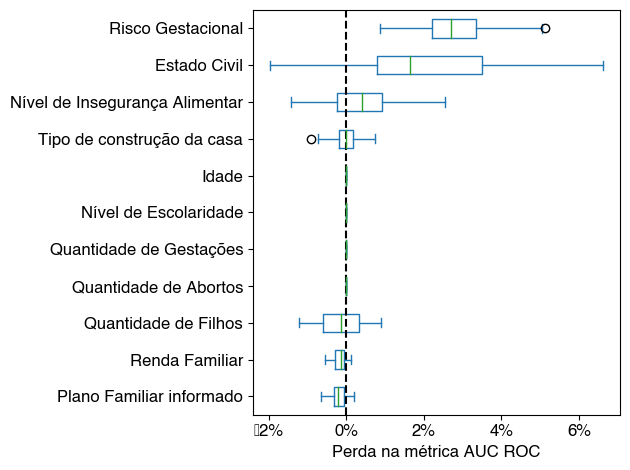

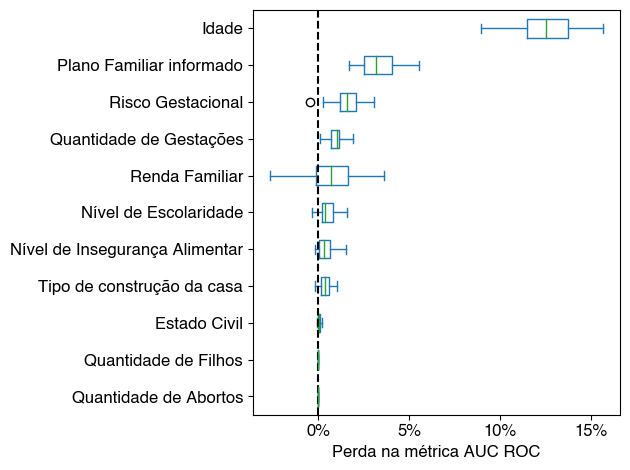

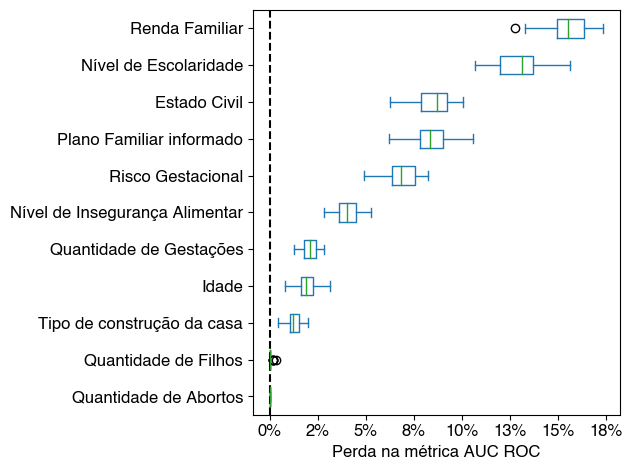

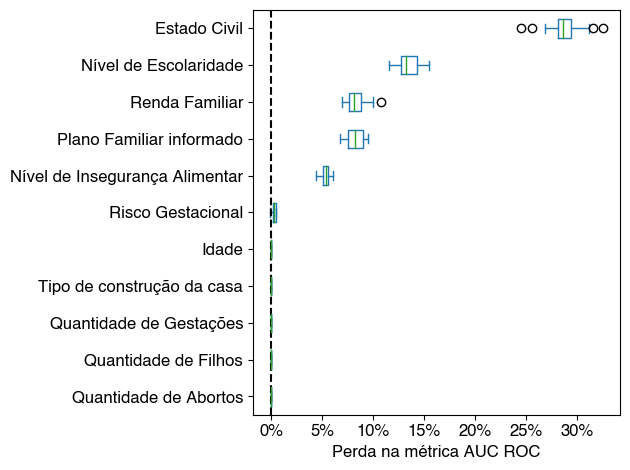

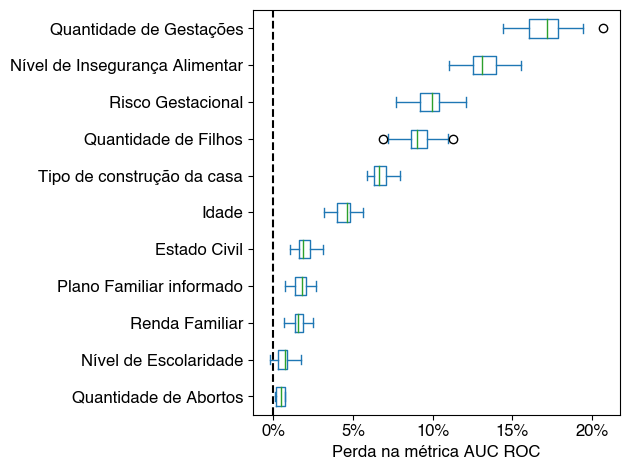

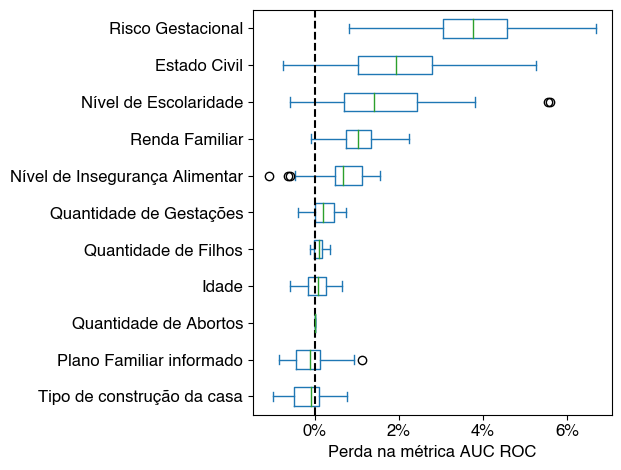

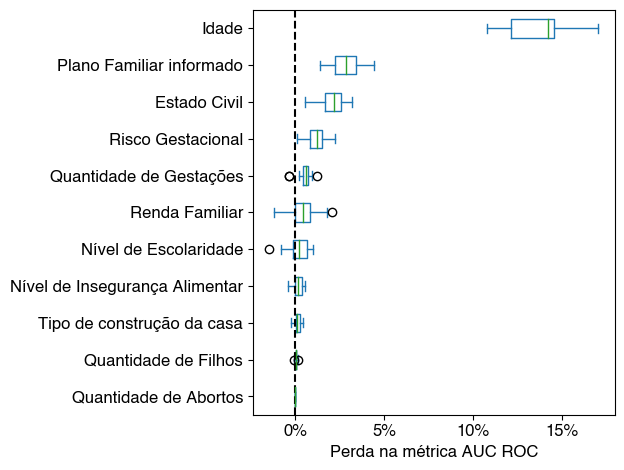

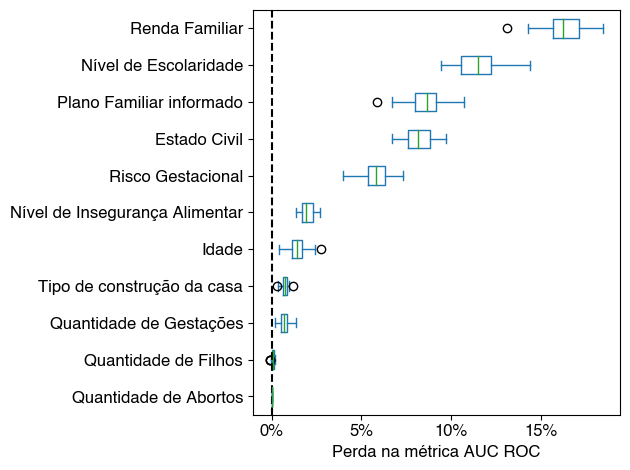

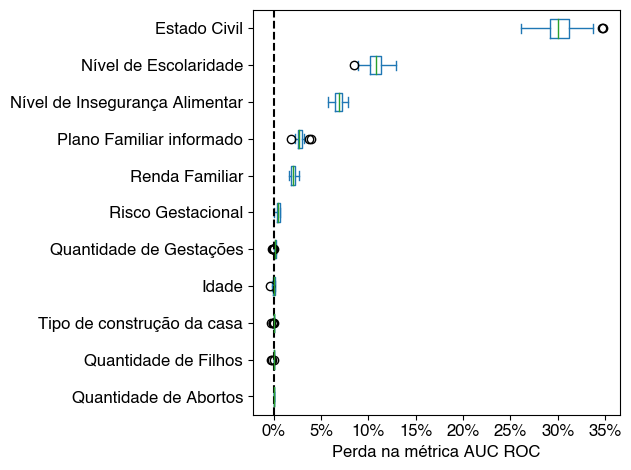

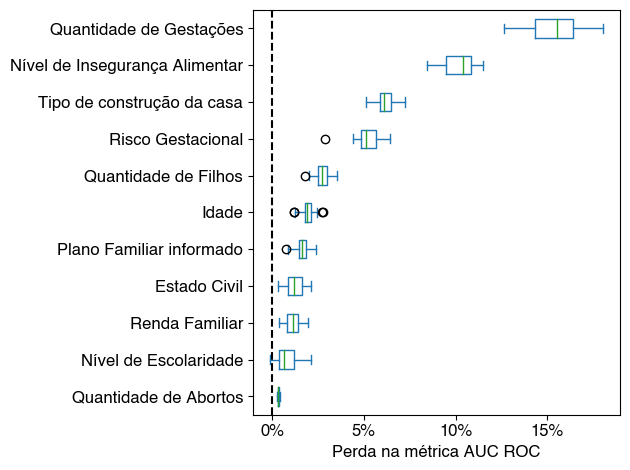

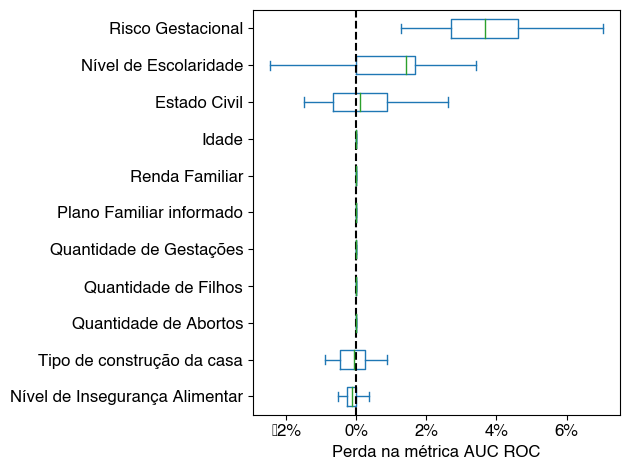

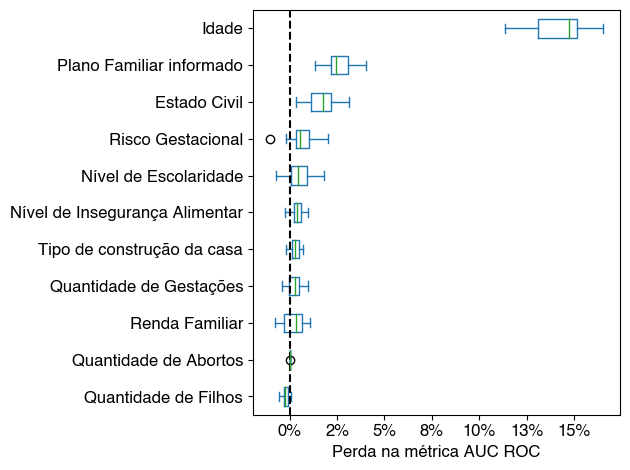

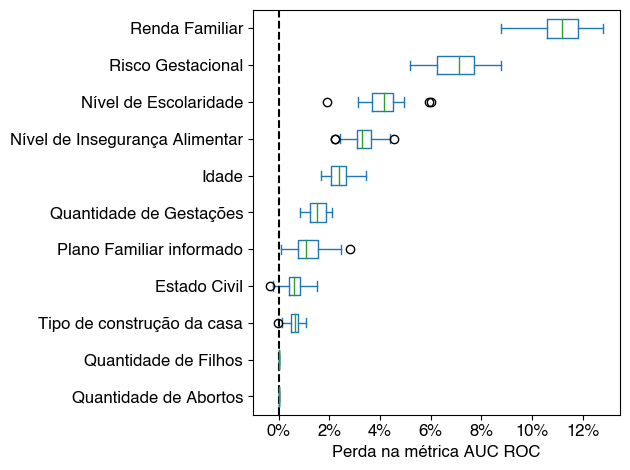

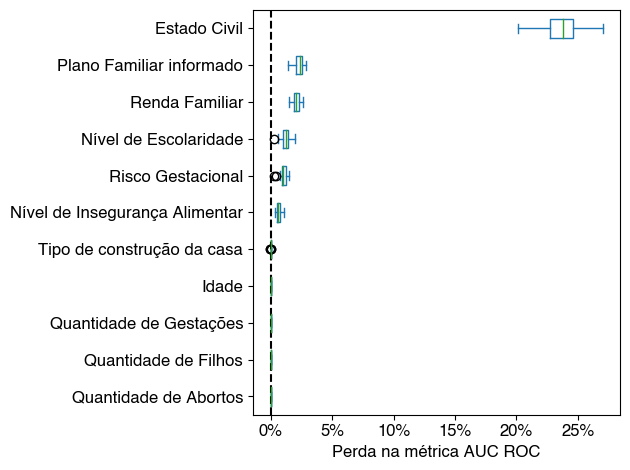

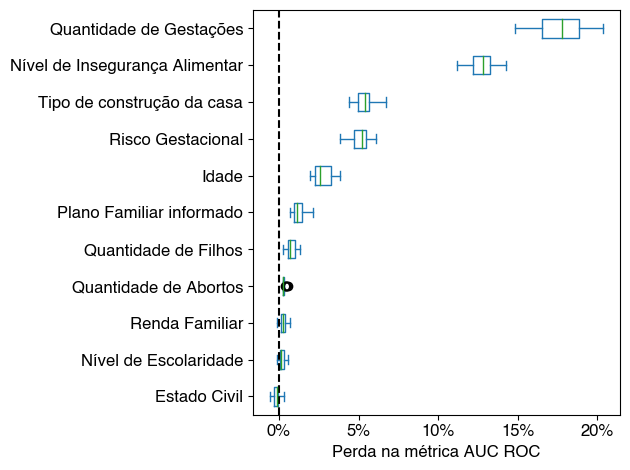

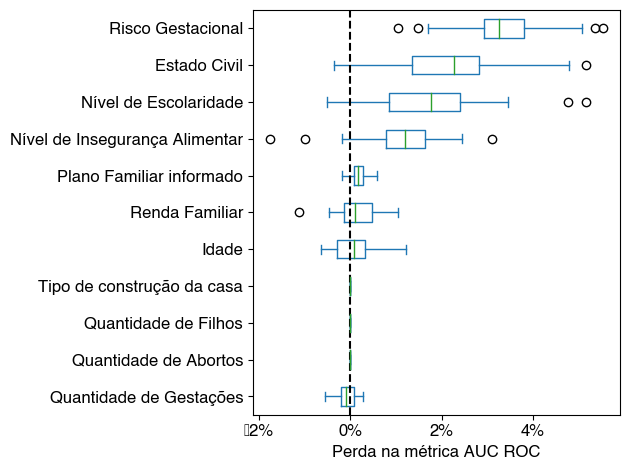

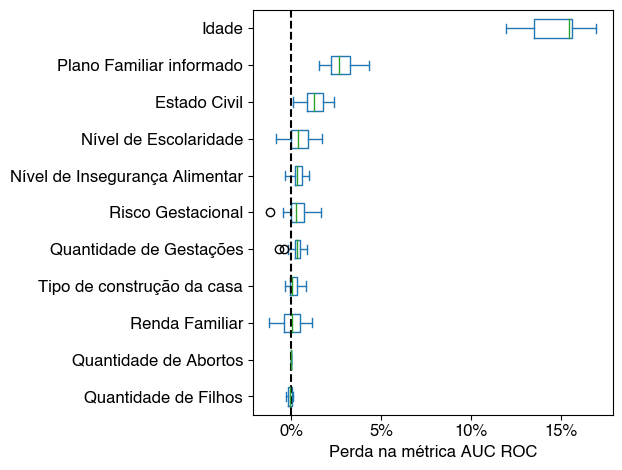

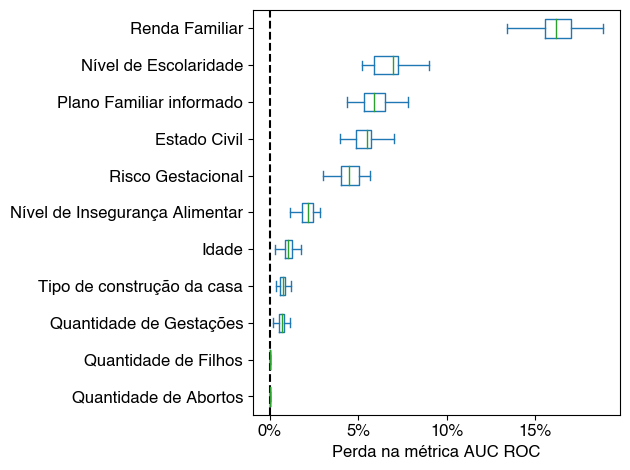

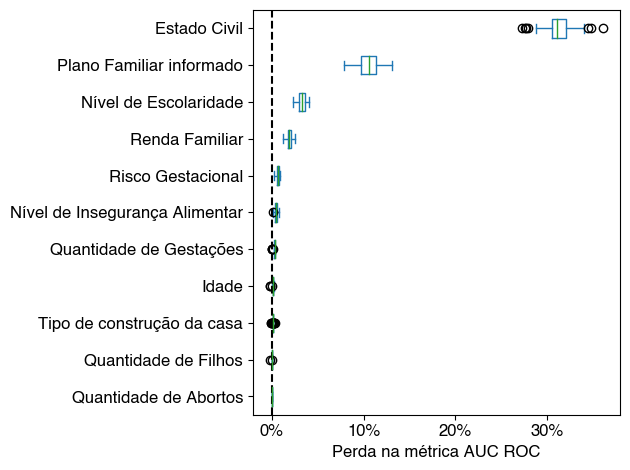

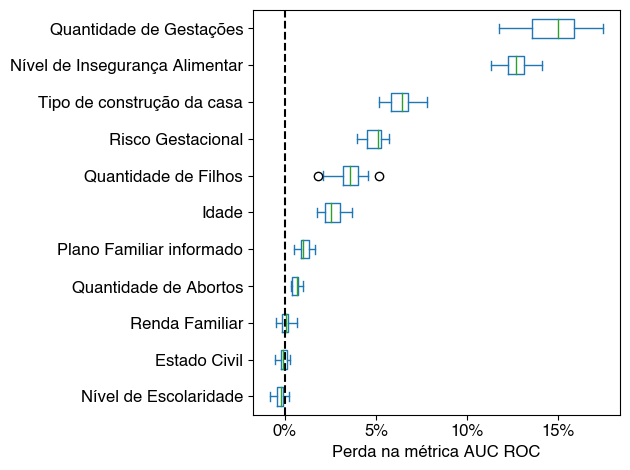

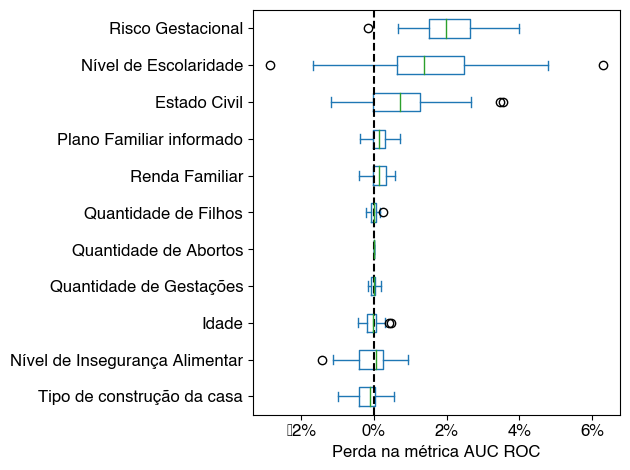

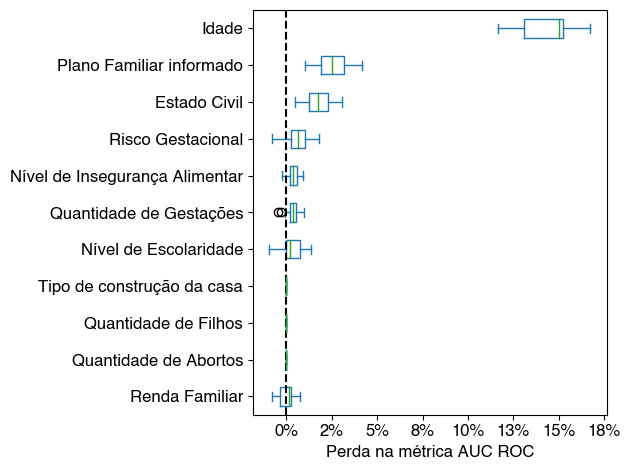

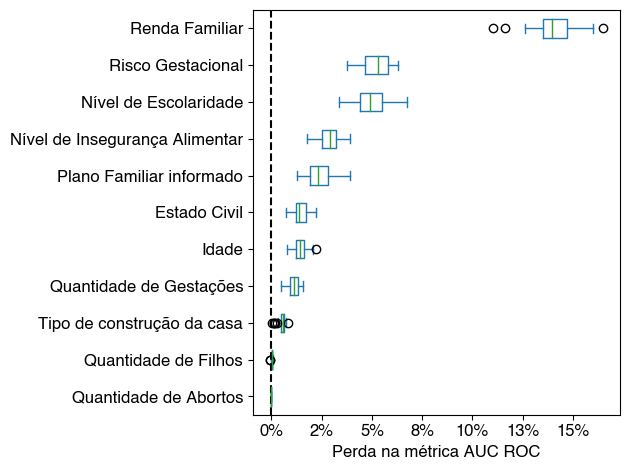

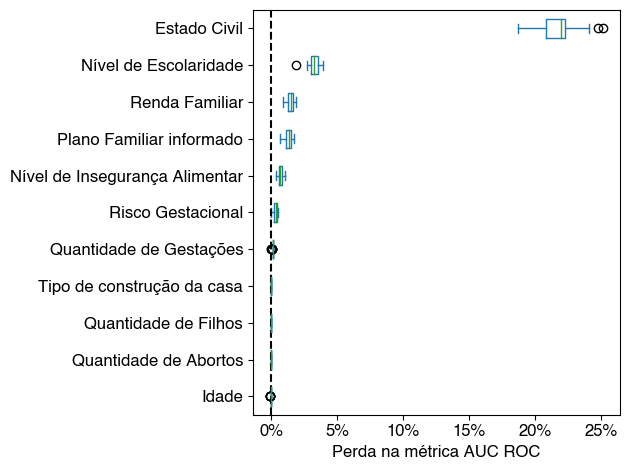

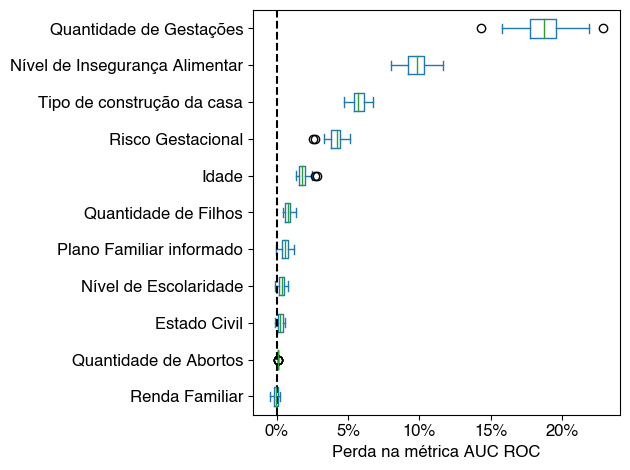

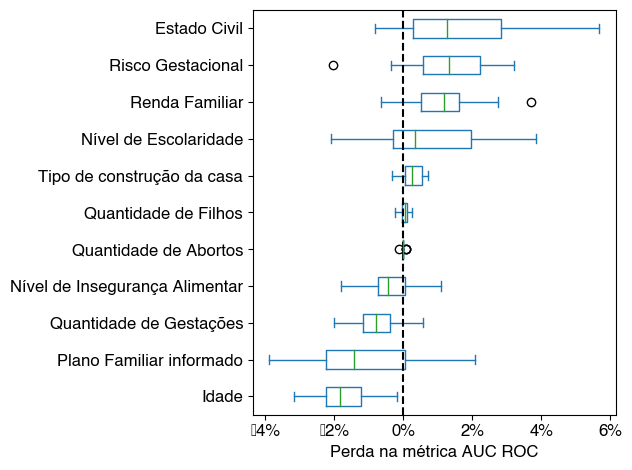

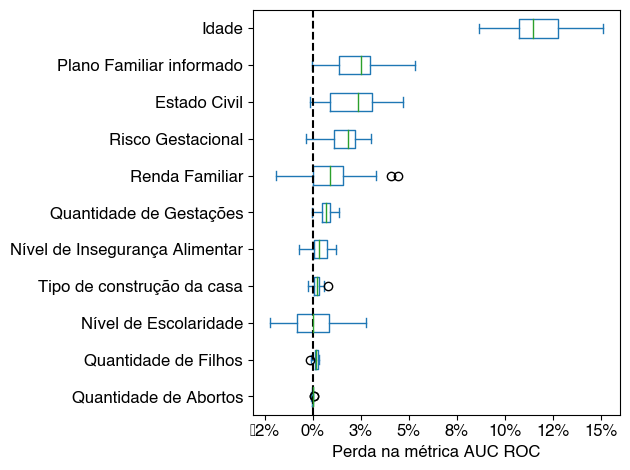

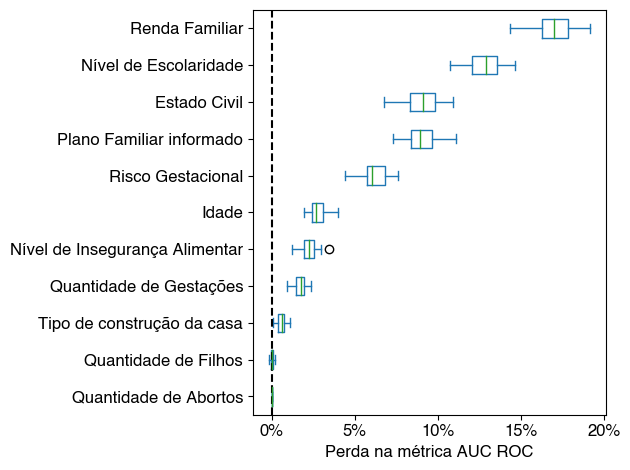

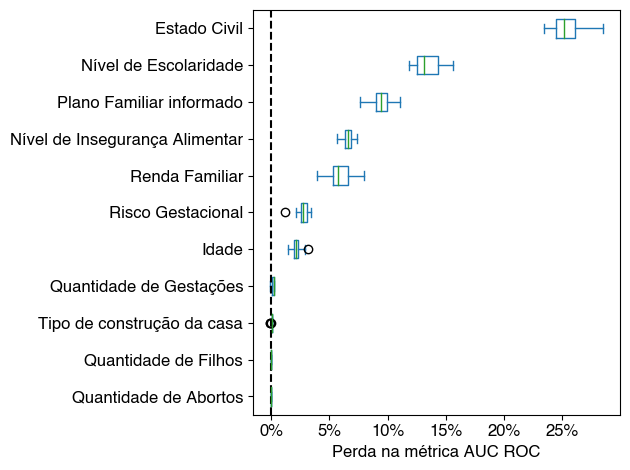

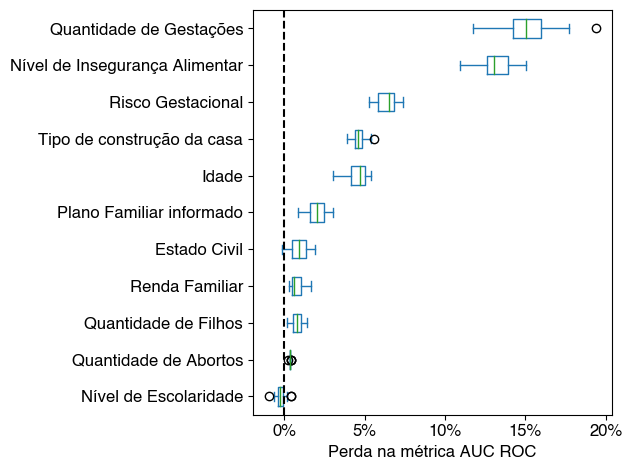

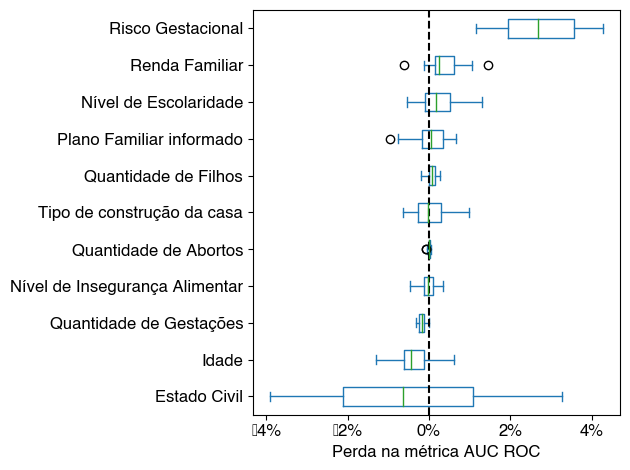

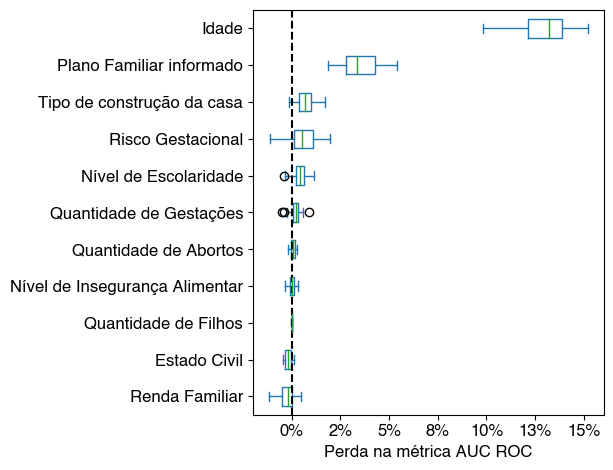

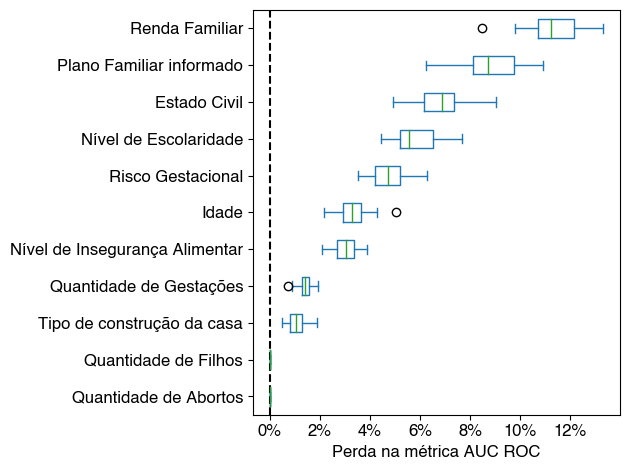

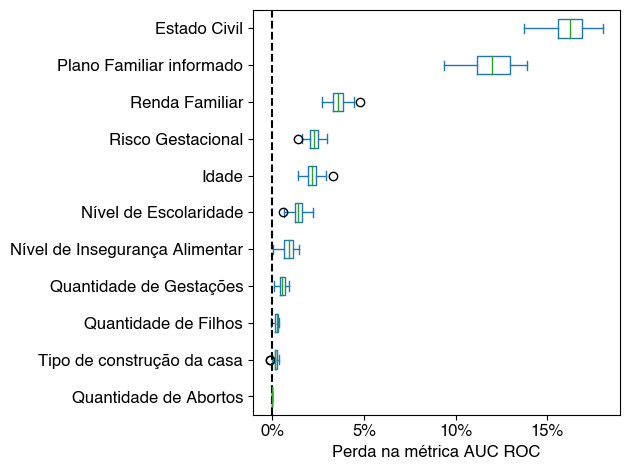

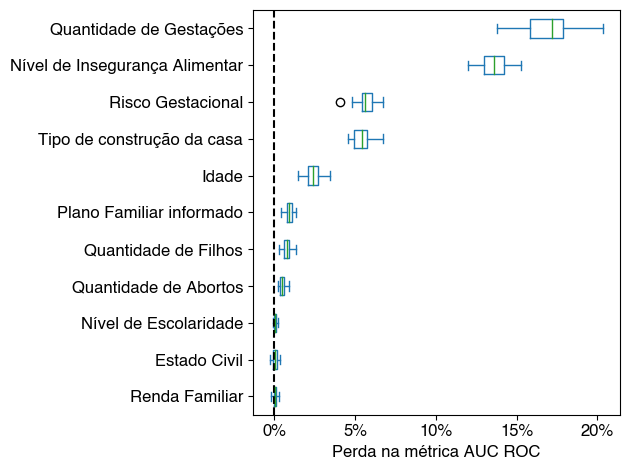

In [ ]:
#base_type = ['base_total', 'base_reduzida'] # base type
base_type = ['base_total'] # base type
#base_type = ['base_reduzida'] # base type
method_undersampling = ['random_under', 'sbc', 'near_miss']
#method_undersampling = ['near_miss', 'sbc']
#method_undersampling = ['random_under']
#method_undersampling = ['sbc']
#method_undersampling = ['near_miss']
type_near_miss = ['1', '2', '3']
models_cols = {'decision_tree': DecisionTreeClassifier, 'random_forest': RandomForestClassifier,
                  'adaboost': AdaBoostClassifier, 'gbm': GradientBoostingClassifier, 'xgboost': XGBClassifier,
                  'knn': KNeighborsClassifier, 'svm': SVC} # pra generalizar e pegar tudo
#models_cols = {'knn': KNeighborsClassifier} # pra generalizar e pegar tudo
#models_cols = {'decision_tree': DecisionTreeClassifier} # pra generalizar e pegar tudo

for model in models_cols.keys(): # pegando o name dos models
  for base_t in base_type:
    for method in method_undersampling:
      #print(method, base_t, model) # pegar o melhor resultado pro method-base_t-model analisado
      if (method == 'random_under') or (method == 'sbc'):
        best_base, best_results, best_grid = return_bases_rus_sbc(method, base_t, model, models_cols[model])
        title_to_save = f'{filter_name_method(method)} {filter_name_model(model)}'
        generate_permutation_graph_v2(best_base, best_grid, models_cols, model, title_to_save)
      elif method == 'near_miss': # deu erro aqui pq o type_near_miss tava como lista ['1'] (eu acho)
        for type_nm in type_near_miss:
          best_base, best_results, best_grid, k_do_auc_roc_max = get_best_auc_roc_near_miss(type_nm, base_t, model, 'near_miss')
          title_to_save = f'{filter_name_method(method)}-{type_nm} {filter_name_model(model)}'
          generate_permutation_graph_v2(best_base, best_grid, models_cols, model, title_to_save)
          # chamando as funções nos dois lugares por causa do for aqui dentro, para generalizar